<a href="https://colab.research.google.com/github/samarthbiraje26/US-Accidents-Exploratory-Data-Analysis/blob/main/Week%201/Basic_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
accidents_df = pd.read_csv('/content/drive/MyDrive/US_Accidents_March23.csv')

Univariate Analysis
Definition:

Univariate analysis examines and describes a single variable or feature in a dataset. The goal is to understand the distribution, central tendency (mean, median, mode), spread (variance, standard deviation), and shape (skewness, kurtosis) of that variable. Common tools include frequency counts, histograms, bar charts, and boxplots.

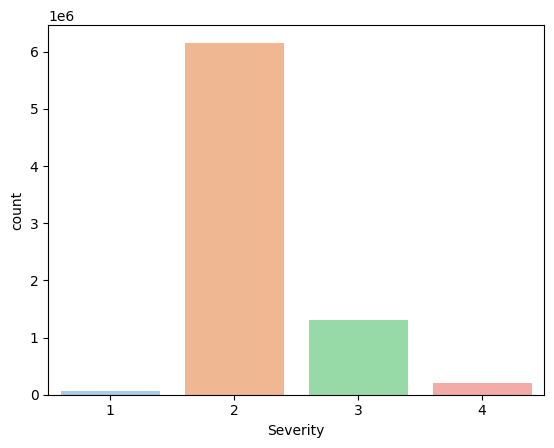

In [ ]:
# Univariate Analysis Example
# Distribution of 'Severity' (categorical)
sns.countplot(x='Severity', data=accidents_df, palette='pastel')
plt.show()

Bivariate Analysis
Definition:

Bivariate analysis explores the relationship between exactly two variables (X and Y) to discover whether they are related and, if so, how. It helps analyze the nature, strength, and direction of the association—using methods such as correlation, scatter plots, cross-tabulation, boxplots, and regression. Examples include height vs. weight, or accident severity vs. weather condition.

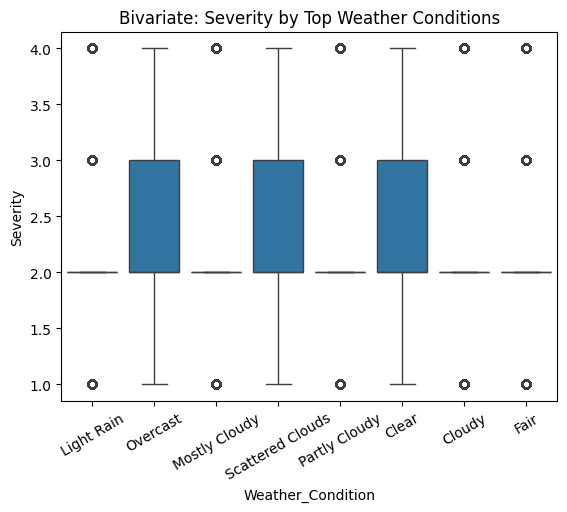

In [ ]:
# Example of Bivariate Analysis
# Relationship between Severity and Weather Condition (categorical vs. Categorical)
top_weather = accidents_df['Weather_Condition'].value_counts().nlargest(8)
sns.boxplot(x='Weather_Condition', y='Severity',
            data=accidents_df[accidents_df['Weather_Condition'].isin(top_weather.index)])
plt.title('Bivariate: Severity by Top Weather Conditions')
plt.xticks(rotation=30)
plt.show()

Multivariate Analysis
Definition:

Multivariate analysis studies three or more variables simultaneously to uncover complex relationships, patterns, and interactions among them. It can show how multiple factors together influence an outcome—using techniques like heatmaps, pairplots, multiple regression, and principal component analysis. Examples include examining how weather, hour, and traffic conditions together affect accident severity.

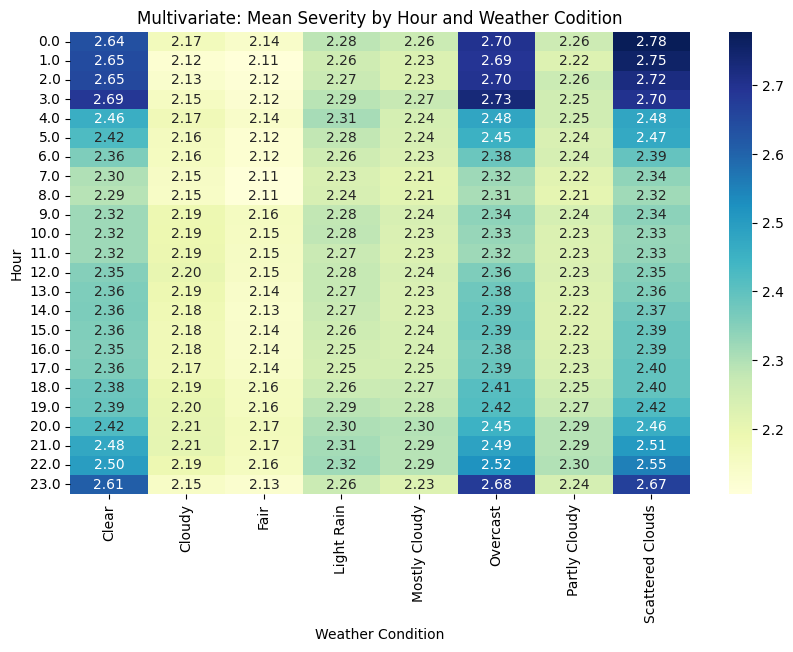

In [ ]:
# Example of Multivariate Analysis
# Severity by Hour and Top Weather Conditions (Heatmap)
if 'Hour' not in accidents_df:
  accidents_df['Hour'] = pd.to_datetime(accidents_df['Start_Time'], errors ='coerce').dt.hour
pivot = accidents_df[accidents_df['Weather_Condition'].isin(top_weather.index)].pivot_table(
    values='Severity', index = 'Hour', columns='Weather_Condition', aggfunc= 'mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Multivariate: Mean Severity by Hour and Weather Codition')
plt.ylabel('Hour')
plt.xlabel('Weather Condition')
plt.show()

Basic Statistics

In [ ]:
# --- Summary statistics for all numerical columns ---
print("Summary statistics for numerical columns:")
display(accidents_df.describe().T)

Summary statistics for numerical columns:


,count,mean,std,min,25%,50%,75%,max
Severity,7728394.0,2.212384,0.487531,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,7728394.0,36.201195,5.076079,24.554800,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,36.261829,5.272905,24.566013,33.462070,36.183495,40.178920,49.075000
End_Lng,4325632.0,-95.725570,18.107928,-124.545748,-117.754345,-88.027890,-80.247086,-67.109242
Distance(mi),7728394.0,0.561842,1.776811,0.000000,0.000000,0.030000,0.464000,441.750000
Temperature(F),7564541.0,61.663286,19.013653,-89.000000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),5729375.0,58.251048,22.389832,-89.000000,43.000000,62.000000,75.000000,207.000000
Humidity(%),7554250.0,64.831041,22.820968,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),7587715.0,29.538986,1.006190,0.000000,29.370000,29.860000,30.030000,58.630000


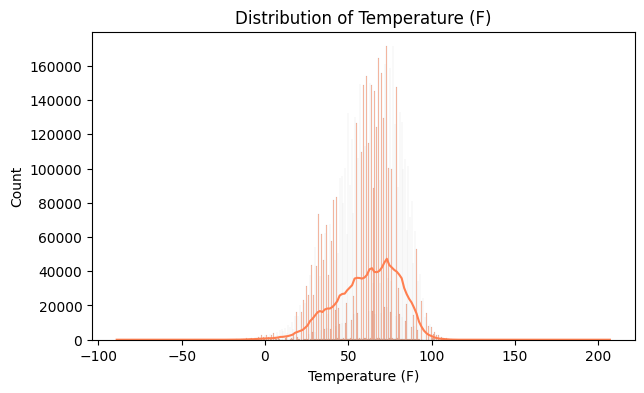

Temperature (F): min = -89.0 | max = 207.0


In [ ]:
# Temperature
plt.figure(figsize=(7, 4))
sns.histplot(accidents_df['Temperature(F)'].dropna(), kde=True, color='coral')
plt.title('Distribution of Temperature (F)')
plt.xlabel('Temperature (F)')
plt.show()
print("Temperature (F): min =", accidents_df['Temperature(F)'].min(),
      "| max =", accidents_df['Temperature(F)'].max())

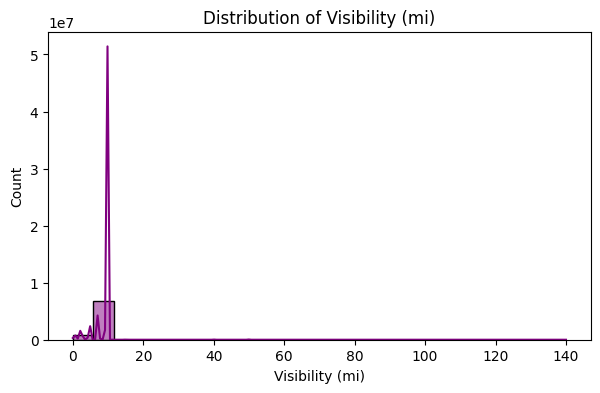

Visibility (mi): min = 0.0 | max = 140.0


In [ ]:
# Visibility
plt.figure(figsize=(7, 4))
sns.histplot(accidents_df['Visibility(mi)'].dropna(), kde=True, color='purple')
plt.title('Distribution of Visibility (mi)')
plt.xlabel('Visibility (mi)')
plt.show()
print("Visibility (mi): min =", accidents_df['Visibility(mi)'].min(),
      "| max =", accidents_df['Visibility(mi)'].max())